In [81]:
geneExp <- read.csv("data.txt", header=FALSE )

In [82]:
print(is.data.frame(geneExp))
print(ncol(geneExp))
print(nrow(geneExp))

[1] TRUE
[1] 16
[1] 99


In [83]:
# Check for non-numeric cells
non_numeric <- sapply(geneExp, function(x) any(is.na(suppressWarnings(as.numeric(as.character(x))))))

# Display columns that contain non-numeric values
non_numeric_columns <- names(geneExp)[non_numeric]
if (length(non_numeric_columns) > 0) {
  cat("Non-numeric columns found:", paste(non_numeric_columns, collapse = ", "), "\n")
} else {
  cat("All columns are numeric.\n")
}

Non-numeric columns found: V1, V4 


In [84]:
geneExp[geneExp == "#REF!"] <- 0

In [85]:
# Check for non-numeric cells
non_numeric <- sapply(geneExp, function(x) any(is.na(suppressWarnings(as.numeric(as.character(x))))))

# Display columns that contain non-numeric values
non_numeric_columns <- names(geneExp)[non_numeric]
if (length(non_numeric_columns) > 0) {
  cat("Non-numeric columns found:", paste(non_numeric_columns, collapse = ", "), "\n")
} else {
  cat("All columns are numeric.\n")
}

Non-numeric columns found: V1 


In [86]:
head(geneExp)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,4,1.00,4,4.0,4,1,3,4.00,2.00,50,15,20.00,12.00,10,6
2,A1CF,0,1.40,0.99,0.0,0,0,0,0.00,0.00,0,0,0.00,0.00,0,0
3,A2LD1,0,0.00,1,1.0,0,2,2,0.00,0.00,2,5,3.00,0.00,1,7
4,A2M,0,0.00,0,0.0,0,0,0,0.00,0.00,0,0,0.00,3.00,0,0
5,A2ML1,1,3.68,0.37,3.1,5,0,1,1.69,3.72,0,0,1.25,3.92,1,4
6,A4GALT,2,3.00,2,11.0,12,5,3,4.00,3.00,0,3,0.00,1.00,0,1


In [87]:
# Extract just the numeric data into a matrix with named rows by gene
rownames(geneExp) <- geneExp$V1
geneExp_matrix <- as.matrix(geneExp[2:16])


In [88]:
str(geneExp_matrix)

 chr [1:99, 1:15] "  4.00" "  0.00" "  0.00" "  0.00" "  1.00" "  2.00" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:99] "A1BG" "A1CF" "A2LD1" "A2M" ...
  ..$ : chr [1:15] "V2" "V3" "V4" "V5" ...


In [90]:
numeric_matrix <- apply(geneExp_matrix, c(1, 2), function(x) as.numeric(trimws(x)))

In [91]:
str(numeric_matrix)

 num [1:99, 1:15] 4 0 0 0 1 2 0 36 101 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:99] "A1BG" "A1CF" "A2LD1" "A2M" ...
  ..$ : chr [1:15] "V2" "V3" "V4" "V5" ...


In [92]:
head(numeric_matrix)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
A1BG,4,1.00,4.00,4.0,4,1,3,4.00,2.00,50,15,20.00,12.00,10,6
A1CF,0,1.40,0.99,0.0,0,0,0,0.00,0.00,0,0,0.00,0.00,0,0
A2LD1,0,0.00,1.00,1.0,0,2,2,0.00,0.00,2,5,3.00,0.00,1,7
A2M,0,0.00,0.00,0.0,0,0,0,0.00,0.00,0,0,0.00,3.00,0,0
A2ML1,1,3.68,0.37,3.1,5,0,1,1.69,3.72,0,0,1.25,3.92,1,4
A4GALT,2,3.00,2.00,11.0,12,5,3,4.00,3.00,0,3,0.00,1.00,0,1


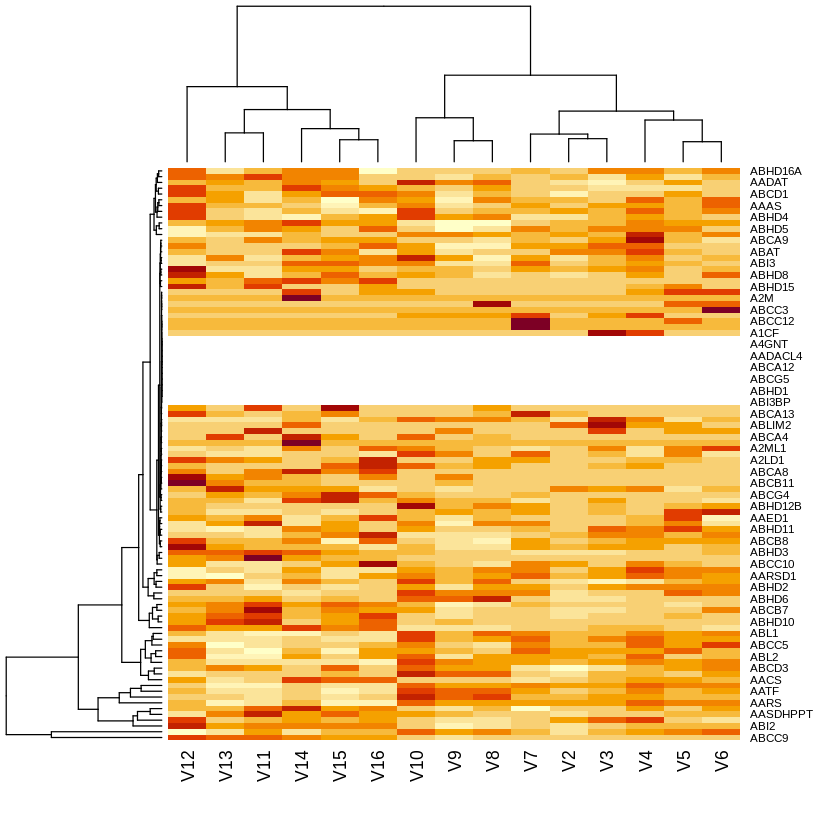

In [93]:
heatmap(numeric_matrix)

In [96]:
log2_matrix <- log2(numeric_matrix + 1)

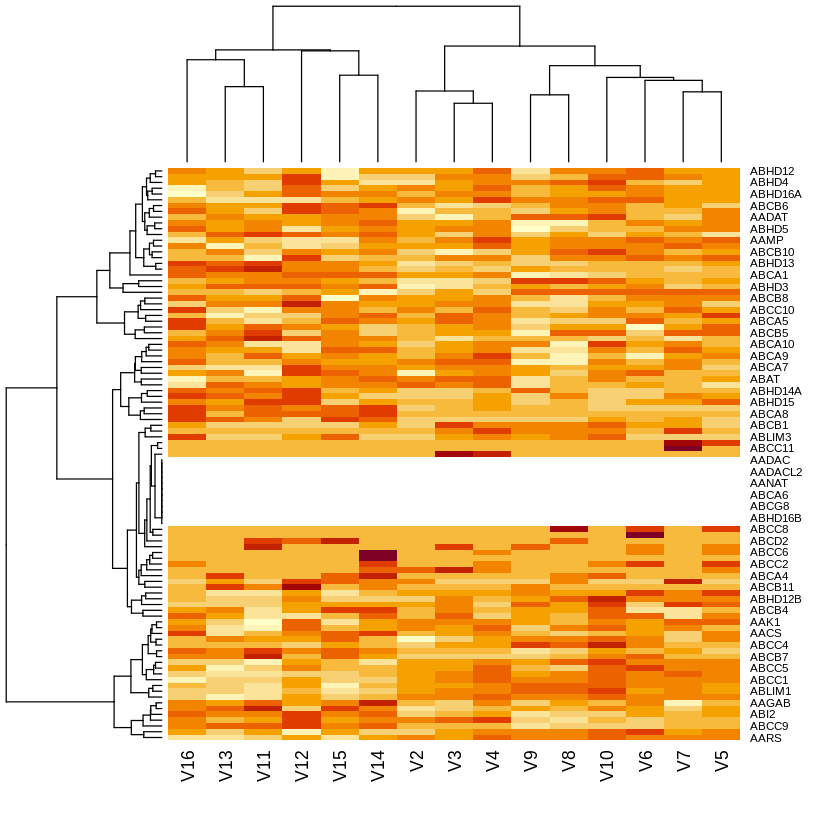

In [97]:
heatmap(log2_matrix)